In [1]:
import os
import pandas as pd
from autoemulate.core.compare import AutoEmulate
from autoemulate.core.sensitivity_analysis import SensitivityAnalysis
from ModularCirc import BatchRunner
import torch
figsize = (9, 5)

In [2]:
param_filename = 'parameters_naghavi_constrained_fixed_T_v_tot'

n_samples = 2048

simulation_out_path = f'../outputs/simulations/output_{n_samples}_samples_{param_filename}/'

parameters_json_file = os.path.join(simulation_out_path, 'parameters.json')

# Load the simulation input parameters
input_params = pd.read_csv(os.path.join(simulation_out_path, f'input_samples_{n_samples}.csv'))

# Load the summary statistics
summary_stats = pd.read_csv(os.path.join(simulation_out_path, f'simulations_summary.csv'))

output_to_emulate = 'p_la_mean'

In [3]:
# Use ModularCirc's BatchRunner to condense parameter names. This requires setting up the sampler first.
br = BatchRunner()

br.setup_sampler(parameters_json_file)

br._parameters_2_sample

{'ao.r': (195.0, 325.0),
 'ao.c': (0.22499999999999998, 0.375),
 'art.r': (843.75, 1406.25),
 'art.c': (2.25, 3.75),
 'ven.r': (6.75, 11.25),
 'ven.c': (84.975, 141.625),
 'av.r': (4.5, 7.5),
 'mv.r': (3.0749999999999997, 5.125),
 'la.E_pas': (0.22499999999999998, 0.375),
 'la.E_act': (0.41250000000000003, 0.6875),
 'la.v_ref': (6.75, 11.25),
 'la.k_pas': (0.01665, 0.07500000000000001),
 'lv.E_pas': (0.75, 1.25),
 'lv.E_act': (2.25, 3.75),
 'lv.v_ref': (7.5, 12.5),
 'lv.k_pas': (0.00999, 0.045)}

In [4]:
# Get column names for parameters up to 'lv.k_pas'
parameter_names = list(input_params.columns[:input_params.columns.get_loc('lv.k_pas') + 1])

input_params[parameter_names]

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,la.v_ref,la.k_pas,lv.E_pas,lv.E_act,lv.v_ref,lv.k_pas
0,305.576111,0.364705,1047.778645,2.796825,7.379755,116.738799,5.767604,3.872886,0.253016,0.650535,10.688184,0.074688,1.155269,3.491967,10.096189,0.040153
1,239.201979,0.294212,1290.672647,3.257753,10.025982,101.463371,6.617964,4.674997,0.357100,0.503905,8.412438,0.042248,0.872700,2.417226,7.947277,0.010497
2,218.335616,0.324832,910.186916,2.417528,10.382382,94.085593,5.249952,4.504283,0.334988,0.421357,6.811585,0.025510,1.109646,3.296170,9.237073,0.033388
3,277.901886,0.254335,1145.884560,3.622402,8.282241,137.229613,7.212086,3.251764,0.293604,0.550802,10.074056,0.054985,0.893664,2.988092,11.464416,0.025878
4,273.455547,0.305361,1370.442680,3.441763,8.862728,123.493007,4.754028,4.111263,0.314531,0.522093,7.346374,0.048180,1.047189,2.495954,12.423861,0.018987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,273.331190,0.254662,889.704303,3.145076,10.400144,100.856723,4.593032,4.225252,0.243955,0.433807,7.887252,0.042891,0.976669,3.218309,10.509026,0.032784
2044,278.025469,0.305661,1096.152814,3.337640,10.700488,86.282045,7.373448,3.274157,0.345412,0.676152,10.621938,0.035173,1.073558,3.663855,10.877649,0.030132
2045,218.255813,0.235456,1347.767227,2.714034,8.880499,127.656617,5.034850,4.585985,0.226839,0.547776,8.488027,0.067631,0.914098,2.614384,8.728469,0.020445
2046,239.284726,0.345498,949.703366,3.705230,6.992401,121.108687,6.455871,4.684628,0.277676,0.447713,7.871447,0.047929,1.162031,3.094889,9.706073,0.041282


In [5]:
Y = summary_stats[output_to_emulate].values

In [6]:
# Turn x into a pytorch tensor
x = torch.tensor(input_params[parameter_names].values, dtype=torch.float32)

# Do the same with Y
y = torch.tensor(Y, dtype=torch.float32)

In [7]:
print(x.shape, y.shape)

torch.Size([2048, 16]) torch.Size([2048])


In [8]:
ae = AutoEmulate(x = x,
                 y = y,
                 models=["GP"])

Comparing models:   0%|          | 0.00/1.00 [00:00<?, ?model/s]

Comparing models: 100%|██████████| 1.00/1.00 [03:10<00:00, 191s/model]


In [9]:
best = ae.best_result()
print(best.model_name)

GaussianProcess


In [10]:
br._parameters_2_sample

{'ao.r': (195.0, 325.0),
 'ao.c': (0.22499999999999998, 0.375),
 'art.r': (843.75, 1406.25),
 'art.c': (2.25, 3.75),
 'ven.r': (6.75, 11.25),
 'ven.c': (84.975, 141.625),
 'av.r': (4.5, 7.5),
 'mv.r': (3.0749999999999997, 5.125),
 'la.E_pas': (0.22499999999999998, 0.375),
 'la.E_act': (0.41250000000000003, 0.6875),
 'la.v_ref': (6.75, 11.25),
 'la.k_pas': (0.01665, 0.07500000000000001),
 'lv.E_pas': (0.75, 1.25),
 'lv.E_act': (2.25, 3.75),
 'lv.v_ref': (7.5, 12.5),
 'lv.k_pas': (0.00999, 0.045)}

In [11]:
# Extract parameter names and bounds from the dictionary
parameters_range = br._parameters_2_sample

parameter_names = list(parameters_range.keys())
parameter_bounds = list(parameters_range.values())

In [12]:
problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds,
}
sa = SensitivityAnalysis(best.model, problem=problem)

In [13]:
sobol_df = sa.run("sobol")
sobol_df

16


,output,parameter,index,value,confidence
0,y1,ao.r,S1,1.001524e-03,0.000100
1,y1,ao.c,S1,1.601730e-03,0.000177
2,y1,art.r,S1,1.012286e-02,0.001118
3,y1,art.c,S1,2.236402e-02,0.002455
4,y1,ven.r,S1,3.719742e-03,0.000400
...,...,...,...,...,...
115,y1,"(lv.E_pas, lv.v_ref)",S2,-7.257169e-04,0.010062
116,y1,"(lv.E_pas, lv.k_pas)",S2,5.691266e-04,0.012771
117,y1,"(lv.E_act, lv.v_ref)",S2,1.521608e-03,0.012698
118,y1,"(lv.E_act, lv.k_pas)",S2,3.978888e-03,0.017204


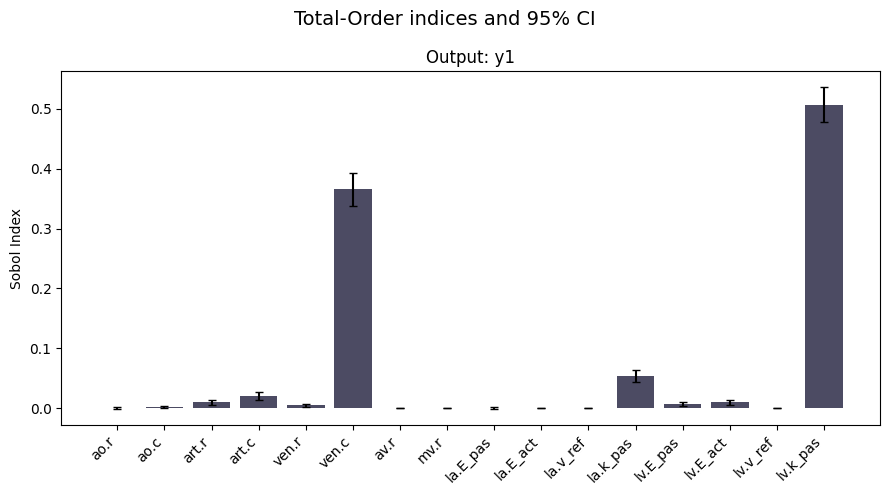

In [19]:
sa.plot_sobol(sobol_df, index="ST", figsize=figsize) 

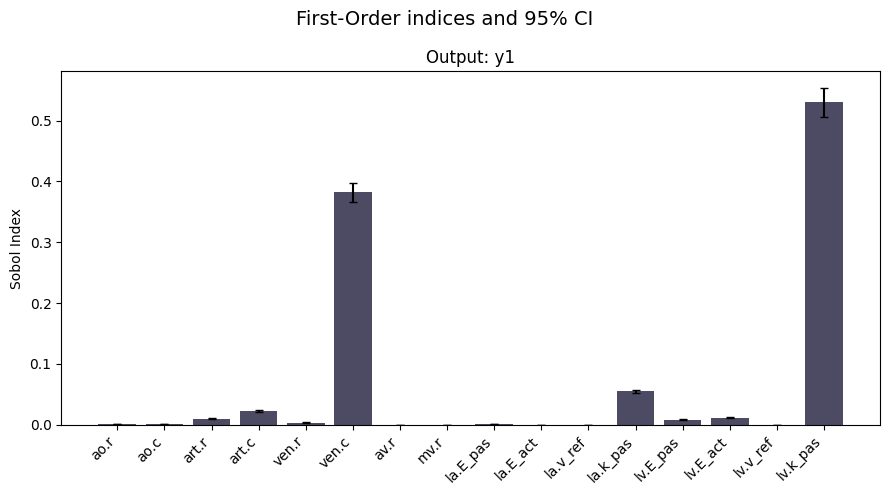

In [20]:
sa.plot_sobol(sobol_df, index="S1", figsize=figsize) 